In [ ]:
import numpy as np
import torch 
import torch.nn as nn
import torchvision
from torchvision import transforms
import torch.optim
import matplotlib.pyplot as plt
from torch.optim.optimizer import Optimizer, required

EPOCH: 1
tensor(1.8798, grad_fn=<NllLossBackward>)
EPOCH: 2
tensor(1.2885, grad_fn=<NllLossBackward>)
EPOCH: 3
tensor(0.9255, grad_fn=<NllLossBackward>)


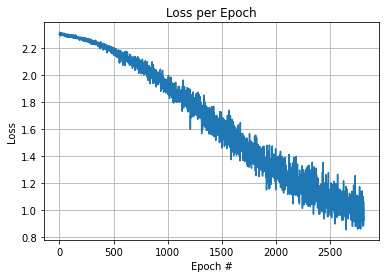

In [ ]:
# Input size (28 x 28)
def neural_net():
  mnist_train = torchvision.datasets.MNIST("data/", train = True, transform=transforms.ToTensor(), download=True)
  mnist_test = torchvision.datasets.MNIST("data/", train = False, transform= transforms.ToTensor(), download=True)
  train = torch.utils.data.DataLoader(mnist_train, batch_size = 64, shuffle = True)
  test = torch.utils.data.DataLoader(mnist_test, batch_size = 64, shuffle = True)
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  model = nn.Sequential(
      nn.Linear(in_features = (28*28), out_features = 64, bias = True),
      nn.ReLU(inplace=True),
      nn.Linear(in_features= 64, out_features=128, bias=True),
      nn.ReLU(inplace=True),
      nn.Linear(in_features= 128, out_features=10)
  )

  loss_func = nn.CrossEntropyLoss()
  learning_rate = .001
  beta = 0.9
  epochs = 3
  loss_arr = []

  for epoch in range(epochs):
    print("EPOCH:", epoch + 1)
    for batch in train:
      X, y = batch
      X = X.view(-1, 28*28)
      model.zero_grad()
      y_predict = model(X)
      loss = loss_func(y_predict, y)
      loss_arr.append(loss)
      loss.backward()
      MyAdagrad(model.parameters(), learning_rate, 1e-8)
      #MyRMSprop(model.parameters(), learning_rate, beta, 1e-8)
      #MyAdam(model.parameters(), learning_rate, 0.9, 0.999, 1e-8)
      
    print(loss)

  plt.plot(loss_arr)
  plt.title('Loss per Epoch')
  plt.ylabel('Loss')
  plt.xlabel('Epoch #')
  plt.grid()
  plt.show()

  return model

def MyAdagrad(params, eta, e):
  with torch.no_grad():
    for param in params:
        param -= eta*(param.grad/torch.sqrt(torch.sum(torch.square(param.grad) + e)))

def MyRMSprop(params, eta, beta, e):
  with torch.no_grad():
    for param in params:
      s_k = 0
      k = len(param.grad) 

      for i in range(len(param.grad)):
        s_k += (1-beta)*(beta**k)*torch.square(param.grad[i])
        k -= 1

      param -= eta*(param.grad/torch.sqrt(s_k + e))


def MyAdam(params, eta, beta_1, beta_2, e):
  with torch.no_grad():
    for param in params:
      s_k = 0
      m_k = 0
      k = len(param.grad) 

      for i in range(len(param.grad)):
        s_k += (1-beta_2)*(beta_2**k)*torch.square(param.grad[i]) # scaling
        m_k += (1-beta_1)*(beta_1**k)*param.grad[i] # momentum
        k -= 1

      param -= eta*(m_k/torch.sqrt(s_k + e))

def main():
  neural_net()


if __name__ == "__main__":
  main()